In [53]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from leia import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import unicodedata
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from PortugueseLemmatizer import PortugueseMess

nltk.download('vader_lexicon')
nltk.download('rslp')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ynx/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package rslp to /home/ynx/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ynx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
dados = pd.read_csv("./MGLU3.csv")

In [38]:

def combinar_paragrafos(texto_lista):
    texto = ' '.join(texto_lista.strip("[]").replace("'", "").split(", "))
    texto = texto.lower()
    return texto

def remove_stop_words(texto):
    stopwords = spacy.lang.pt.stop_words.STOP_WORDS
    retorno = []
    for p in texto:
        if p not in stopwords:
            retorno.append(p)
    return retorno

def remove_pontuacao(texto):
    retorno = []
    for token in texto:
        token = re.sub(r'[^a-zA-Z0-9\s]', '', token)
        token = unicodedata.normalize('NFD', token).encode('ascii', 'ignore').decode('utf-8')
        retorno.append(token)
    retorno = list(filter(None, retorno))
    return retorno

def analisar_sentimento(texto):
    analisador = SentimentIntensityAnalyzer()
    
    if type(texto) == list:
        texto = " ".join(texto)
    return analisador.polarity_scores(texto)['compound'] 

def tokenizacao_lemmatizer(texto):
    tokens = word_tokenize(texto)
    palavras_lemmatizadas = [PortugueseMess(w) for w in tokens]
    return palavras_lemmatizadas

def retornar_sentimento(sentimento):
    if sentimento >= 0.05:
        return 'positivo'
    elif sentimento <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [42]:
pd.options.display.max_colwidth = 50

dados['texto'] = dados['texto'].apply(combinar_paragrafos)
dados['sent_proc_cru'] = dados['texto'].apply(analisar_sentimento)

dados['proc_1'] = dados['texto'].apply(tokenizacao_lemmatizer)
dados['proc_2'] = dados['proc_1'].apply(remove_stop_words)
dados['proc_3'] = dados['proc_2'].apply(remove_pontuacao)
dados['sent_proc_3'] = dados['proc_3'].apply(analisar_sentimento)

dados['sent_cru_texto'] = dados['sent_proc_cru'].apply(retornar_sentimento)
dados['sent_proc_3_texto'] = dados['sent_proc_3'].apply(retornar_sentimento)
dados.head()

,Unnamed: 0,url,titulo,data,hora,texto,sent_proc_cru,proc_1,proc_2,proc_3,sent_proc_3,sent_cru_texto,sent_proc_3_texto
0,0,https://br.investing.com/news/stock-market-new...,"WhatsApp lança recurso ""Flows"" para compras e ...",20.09.2023,15:35,por patricia vilas boas são paulo (reuters) - ...,0.9127,"[por, patric, vila, bom, ser, paul, (, reut, )...","[patric, vila, paul, (, reut, ), -, whatsapp, ...","[patric, vila, paul, reut, whatsapp, anunciar,...",-0.7579,positivo,negativo
1,1,https://br.investing.com/news/politics/janja-e...,Janja e ministras participam de encontro de mu...,18.09.2023,18:04,a primeira-dama janja lula da silva participou...,0.3802,"[o, primeira-dam, janj, lul, da, silvar, parti...","[primeira-dam, janj, lul, silvar, participar, ...","[primeiradam, janj, lul, silvar, participar, e...",0.5719,positivo,positivo
2,2,https://br.investing.com/news/stock-market-new...,"À espera de Copom e Fed, Ibovespa inicia seman...",18.09.2023,14:44,o ibovespa perdeu força e não conseguiu susten...,-0.9022,"[o, ibovesp, perder, forçar, e, não, conseguir...","[ibovesp, perder, forçar, conseguir, sustent, ...","[ibovesp, perder, forar, conseguir, sustent, l...",-0.6908,negativo,negativo
3,3,https://br.investing.com/news/economy/fortuna-...,Fortuna de bilionários brasileiros equivale a ...,15.09.2023,14:10,o patrimônio dos 280 bilionários brasileiros l...,0.1531,"[o, patrimôni, do, 280, bilionário, brasileiro...","[patrimôni, 280, bilionário, brasileiro, lista...","[patrimni, 280, bilionrio, brasileiro, listado...",-0.5106,positivo,negativo
4,4,https://br.investing.com/news/stock-market-new...,Ibovespa avança com exterior ajudando Vale e P...,14.09.2023,11:49,por paula arend laier são paulo (reuters) - o ...,-0.0258,"[por, paul, arend, lai, ser, paul, (, reut, ),...","[paul, arend, lai, paul, (, reut, ), -, iboves...","[paul, arend, lai, paul, reut, ibovesp, avanar...",-0.2500,neutro,negativo


In [44]:
def plotar_analise(df, coluna):
    negativos = 0
    neutros = 0
    positivos = 0

    for analise in df[coluna]:
        if analise == 'positivo':
            positivos += 1
        elif analise == 'negativo':
            negativos += 1
        else:
            neutros += 1

    sentimentos = ['Negativo', 'Neutro', 'Positivo']
    quantidades = [negativos, neutros, positivos]

    for i, v in enumerate(quantidades):
        plt.text(sentimentos[i], v, str(v), ha='center', va='bottom')

    plt.bar(sentimentos, quantidades, color=['red', 'blue', 'green'])
    plt.xlabel('Sentimento')
    plt.ylabel('Quantidade')
    plt.title('Distribuição de Sentimentos')
    plt.show()

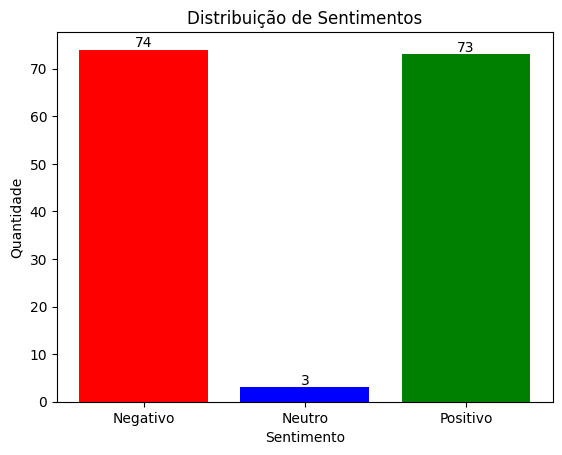

In [45]:
plotar_analise(dados, 'sent_cru_texto')

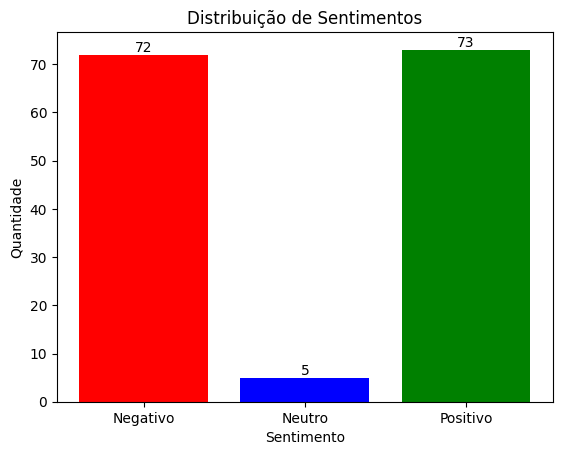

In [47]:
plotar_analise(dados, 'sent_proc_3_texto')

In [52]:
pd.options.display.max_colwidth = 150

print(dados[['url', 'sent_proc_3_texto']])

                                                                                                                                     url  \
0             https://br.investing.com/news/stock-market-news/whatsapp-lanca-recurso-flows-para-compras-e-servicos-no-aplicativo-1157852   
1                             https://br.investing.com/news/politics/janja-e-ministras-participam-de-encontro-de-mulheres-na-onu-1157039   
2                  https://br.investing.com/news/stock-market-news/-espera-de-copom-e-fed-ibovespa-inicia-semana-em-baixa-de-040-1157027   
3    https://br.investing.com/news/economy/fortuna-de-bilionarios-brasileiros-equivale-a-1535-do-pib-veja-setores-mais-prosperos-1156388   
4      https://br.investing.com/news/stock-market-news/ibovespa-avanca-com-exterior-ajudando-vale-e-petrobras-casas-bahia-desaba-1155798   
..                                                                                                                                   ...   
145     https://br.i